# Proyek Analisis Data: E-commerce Dataset
- **Nama:** Steven Faustin Orginata
- **Email:** stevenfo0711@gmail.com
- **ID Dicoding:** stevenfo

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Bagaimana tren pemesanan bulanan di aplikasi ini pada waktu 2017 dan 2018? Apakah ada perbedaan signifikan di antara 2 tahun tersebut?

- Pertanyaan 2
Dimana state dengan jumlah order paling banyak dan sedikit?

- Pertanyaan 3
Apa kategori produk yang paling sedikit dan banyak dibeli oleh pengguna?

- Pertanyaan 4
Apa metode pembayaran yang paling banyak dan sedikit dipakai pengguna?

- Pertanyaan 5
Berapa persen order yang di-cancel?

- Pertanyaan 6
Kapan pengguna memesan terakhir kali?

- Pertanyaan 7
Seberapa sering pengguna memesan dalam beberapa bulan terakhir?

- Pertanyaan 8
Berapa banyak uang yang dihabiskan pengguna dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
order_item_df = pd.read_csv("data/olist_order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [3]:
product_df = pd.read_csv("data/olist_products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [4]:
product_translate_df = pd.read_csv("data/product_category_name_translation.csv")
product_translate_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [5]:
customer_df = pd.read_csv("data/olist_customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
payment_df = pd.read_csv("data/olist_order_payments_dataset.csv")
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_df = pd.read_csv("data/olist_orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
order_customer_df = pd.merge(
    left=order_df,
    right=customer_df,
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)
order_customer_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [9]:
order_product_df = pd.merge(
    left=order_item_df,
    right=product_df,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
order_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [10]:
order_product_df = pd.merge(
    left=order_product_df,
    right=product_translate_df,
    how="outer",
    left_on="product_category_name",
    right_on="product_category_name"
)
order_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00137e170939bba5a3134e2386413108,1,672e757f331900b9deea127a2a7b79fd,e59aa562b9f8076dd550fcddf0e73491,2017-11-30 06:30:55,397.0,24.65,agro_industria_e_comercio,39.0,383.0,1.0,2650.0,30.0,30.0,20.0,agro_industry_and_commerce
1,010b143d83a59b355cd5a75c0f0fd785,1,6ff1fc9209c7854704a4f75c9fac41b4,4e922959ae960d389249c378d1c939f5,2017-09-05 23:44:47,22.0,34.15,agro_industria_e_comercio,59.0,489.0,2.0,233.0,16.0,5.0,13.0,agro_industry_and_commerce
2,010b143d83a59b355cd5a75c0f0fd785,2,6ff1fc9209c7854704a4f75c9fac41b4,4e922959ae960d389249c378d1c939f5,2017-09-05 23:44:47,22.0,34.15,agro_industria_e_comercio,59.0,489.0,2.0,233.0,16.0,5.0,13.0,agro_industry_and_commerce
3,010b143d83a59b355cd5a75c0f0fd785,3,6ff1fc9209c7854704a4f75c9fac41b4,4e922959ae960d389249c378d1c939f5,2017-09-05 23:44:47,22.0,34.15,agro_industria_e_comercio,59.0,489.0,2.0,233.0,16.0,5.0,13.0,agro_industry_and_commerce
4,010b143d83a59b355cd5a75c0f0fd785,4,6ff1fc9209c7854704a4f75c9fac41b4,4e922959ae960d389249c378d1c939f5,2017-09-05 23:44:47,22.0,34.15,agro_industria_e_comercio,59.0,489.0,2.0,233.0,16.0,5.0,13.0,agro_industry_and_commerce


**Insight:**
- Me-load data dan merge data untuk mendapatkan data yang dibutuhkan untuk menjawab pertanyaan bisnis

### Assessing Data

In [11]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [12]:
payment_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [13]:
payment_df.duplicated().sum()

np.int64(0)

In [14]:
payment_df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [15]:
order_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.1+ MB


In [16]:
order_customer_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [17]:
order_customer_df.duplicated().sum()

np.int64(0)

In [18]:
order_product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

In [19]:
order_product_df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1627
dtype: int64

In [20]:
order_product_df.duplicated().sum()

np.int64(0)

**Insight:**
- Tidak ada data yang null untuk data payment, namun ada value not defined yang sama seperti null. Terdapat beberapa data null pada data order_customer (kemungkinan karena ada order yang di-cancel) dan data order_product
- Tidak ada data yang duplikat.

### Cleaning Data

In [21]:
payment_df = payment_df.drop(payment_df[payment_df['payment_type'] == 'not_defined'].index)

In [22]:
order_customer_df.dropna(axis=1, inplace=True)
order_product_df.dropna(axis=0, inplace=True)

In [23]:
order_customer_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [24]:
order_customer_df = order_customer_df[["order_id", "customer_id", "order_status", "order_purchase_timestamp", "customer_state"]]

In [25]:
order_product_df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

**Insight:**
- Missing value pada data order_customer tidak di-drop row karena kita memerlukan informasi order dengan status canceled. Oleh karena itu, yang di-drop adalah kolomnya.
- Beberapa kolom yang tidak penting tidak diambil dalam data untuk mempercepat komputasi

## Exploratory Data Analysis (EDA)

### Explore Payment Data (payment_df)

In [26]:
payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
Name: order_id, dtype: int64

**Insight:**
- Metode Pembayaran yang paling sering dipakai adalah credit card
- Metode Pembayaran yang paling jarang dipakai adalah debit card

### Explore Order Product Data (order_product_df)

In [27]:
order_product_df.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               9417
health_beauty                8836
sports_leisure               7720
computers_accessories        6689
furniture_decor              6449
                             ... 
arts_and_craftmanship          23
la_cuisine                     13
cds_dvds_musicals              12
fashion_childrens_clothes       8
security_and_services           2
Name: order_id, Length: 71, dtype: int64

**Insight:**
- Kategori Produk yang paling sering dibeli adalah bed_bath_table
- Kategori Produk yang paling jarang dibeli adalah security_and_services

### Explore Order Customer Data (order_customer_df)

In [28]:
order_customer_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

In [29]:
canceled_df = order_customer_df[order_customer_df['order_status'] == 'canceled']
canceled_df

,order_id,customer_id,order_status,order_purchase_timestamp,customer_state
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,SP
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,SP
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,PR
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,SP
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,MG
...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,SC
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,SP
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,PR
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,SP


In [30]:
jumlah_canceled = canceled_df.shape[0]
jumlah_canceled

625

In [31]:
jumlah_total_order = order_customer_df.shape[0]
jumlah_total_order

99441

In [32]:
persentase_canceled = jumlah_canceled / jumlah_total_order * 100
persentase_canceled

0.6285133898492574

In [33]:
customer_id_in_orders_df =  order_df.customer_id.tolist()
customer_df["status"] = customer_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
70738,bea5832c9431c2d2088697935c46a9c8,a39d1d1c60d50d29917037ad922ec1aa,6656,itapevi,SP,Active
4041,82bfba21f1ccdbffe8c25920039f6d50,72f4457edfd9a30747e06bdcf34882cb,41820,salvador,BA,Active
20061,5e8fb10b7dfa3d8ecfe7a35cecd17fb2,a9527e2dc08e10326d18fb0d6d41e072,3170,sao paulo,SP,Active
27782,d33c3532d272d4378f30c87b5dd83a03,51bd0e3271041bb294410f38f9643446,63122,crato,CE,Active
90600,f4e93290ffb2b56c8820d4fcc4cfd00b,9454d2cbe5e471d051a3e90f7342e637,2935,sao paulo,SP,Active


**Insight:**
- State dengan jumlah order yang paling banyak adalah SP
- State dengan jumlah order yang paling sedikit adalah RR
- Persentase order dengan status canceled atau di-cancel adalah 0.63% (625 dari 99441)

In [34]:
merge_df = pd.merge(
    left=order_product_df,
    right=order_customer_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

In [35]:
all_df = pd.merge(
    left=merge_df,
    right=payment_df,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)

In [ ]:
# all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

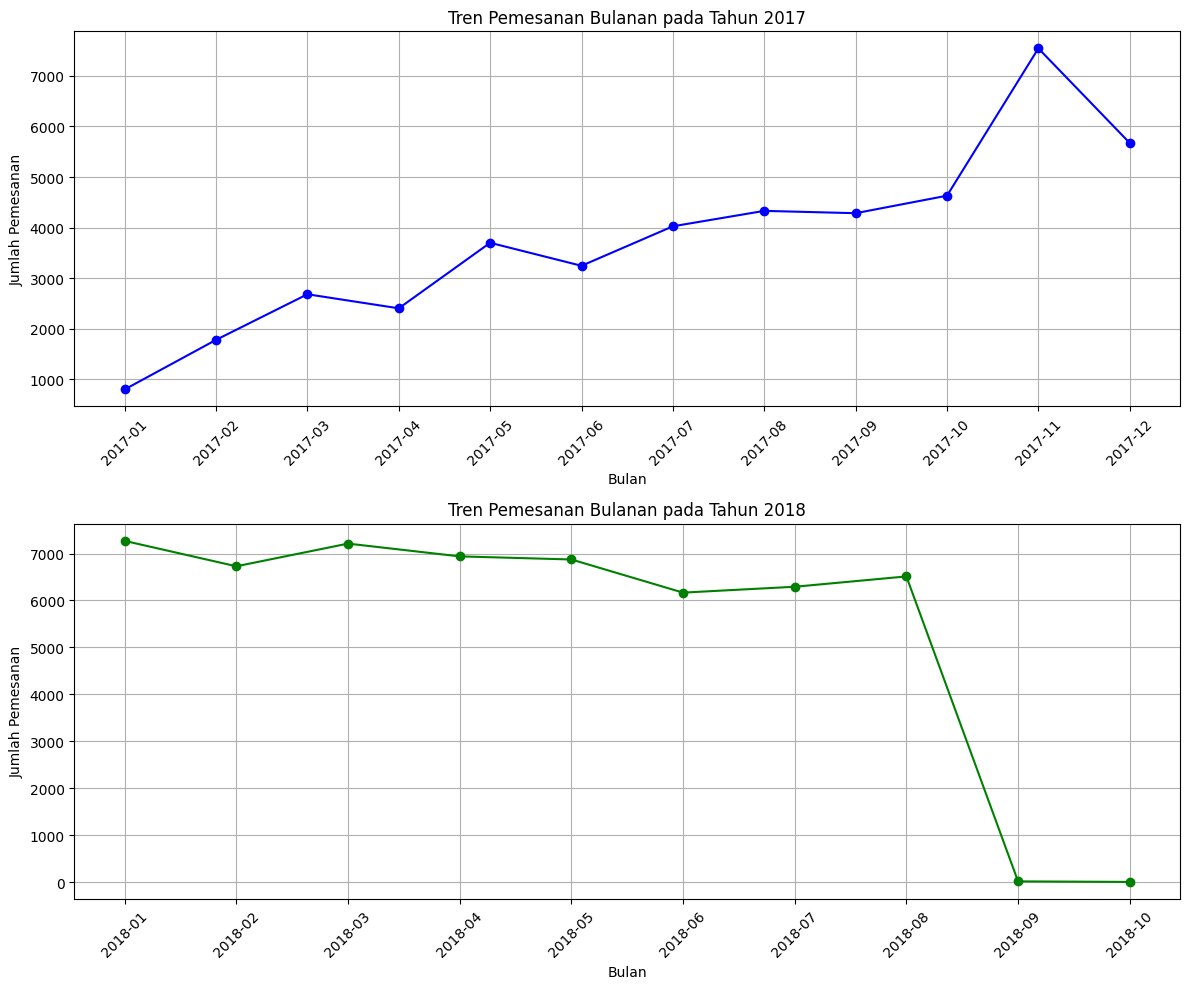

In [36]:
order_customer_df['order_purchase_timestamp'] = pd.to_datetime(order_customer_df['order_purchase_timestamp'])
df_2017 = order_customer_df[order_customer_df['order_purchase_timestamp'].dt.year == 2017]
df_2018 = order_customer_df[order_customer_df['order_purchase_timestamp'].dt.year == 2018]
monthly_orders_2017 = df_2017.groupby(df_2017['order_purchase_timestamp'].dt.to_period('M')).size()
monthly_orders_2018 = df_2018.groupby(df_2018['order_purchase_timestamp'].dt.to_period('M')).size()
monthly_orders_2017.index = monthly_orders_2017.index.astype(str)
monthly_orders_2018.index = monthly_orders_2018.index.astype(str)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.plot(monthly_orders_2017.index, monthly_orders_2017.values, marker='o', color='b')
ax1.set_title('Tren Pemesanan Bulanan pada Tahun 2017')
ax1.set_xlabel('Bulan')
ax1.set_ylabel('Jumlah Pemesanan')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

ax2.plot(monthly_orders_2018.index, monthly_orders_2018.values, marker='o', color='g')
ax2.set_title('Tren Pemesanan Bulanan pada Tahun 2018')
ax2.set_xlabel('Bulan')
ax2.set_ylabel('Jumlah Pemesanan')
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Pertanyaan 2:

C:\Users\ACER\AppData\Local\Temp\ipykernel_24424\2946430821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="customer_state", data=state_df.head(5), palette=colors, ax=ax[0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_24424\2946430821.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="customer_state", data=state_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])


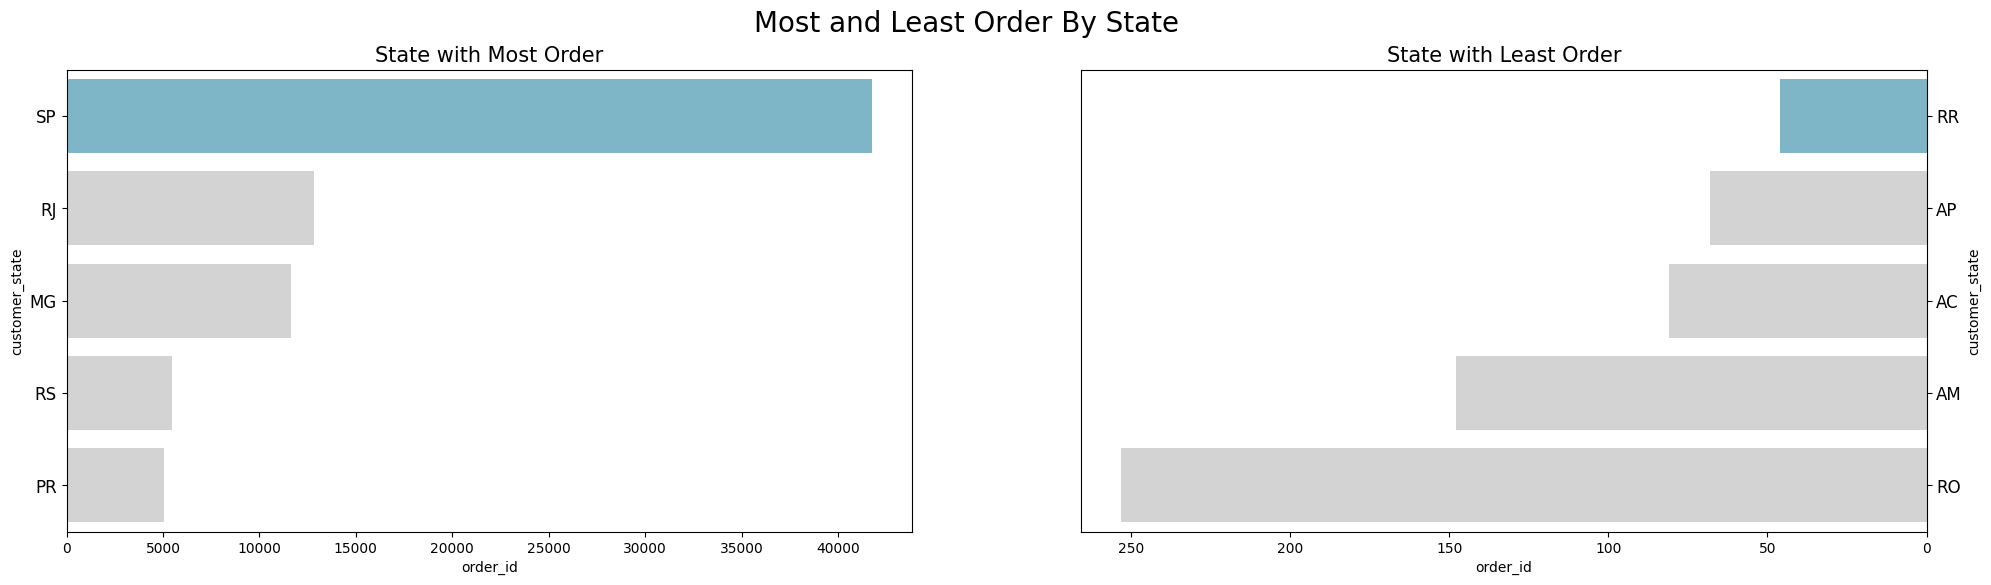

In [37]:
state_df = order_customer_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="customer_state", data=state_df.head(5), palette=colors, ax=ax[0])
ax[0].set_title("State with Most Order", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_id", y="customer_state", data=state_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("State with Least Order", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Most and Least Order By State", fontsize=20)
plt.show()

### Pertanyaan 3:

C:\Users\ACER\AppData\Local\Temp\ipykernel_24424\3006080913.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name_english", data=product_df.head(5), palette=colors, ax=ax[0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_24424\3006080913.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name_english", data=product_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])


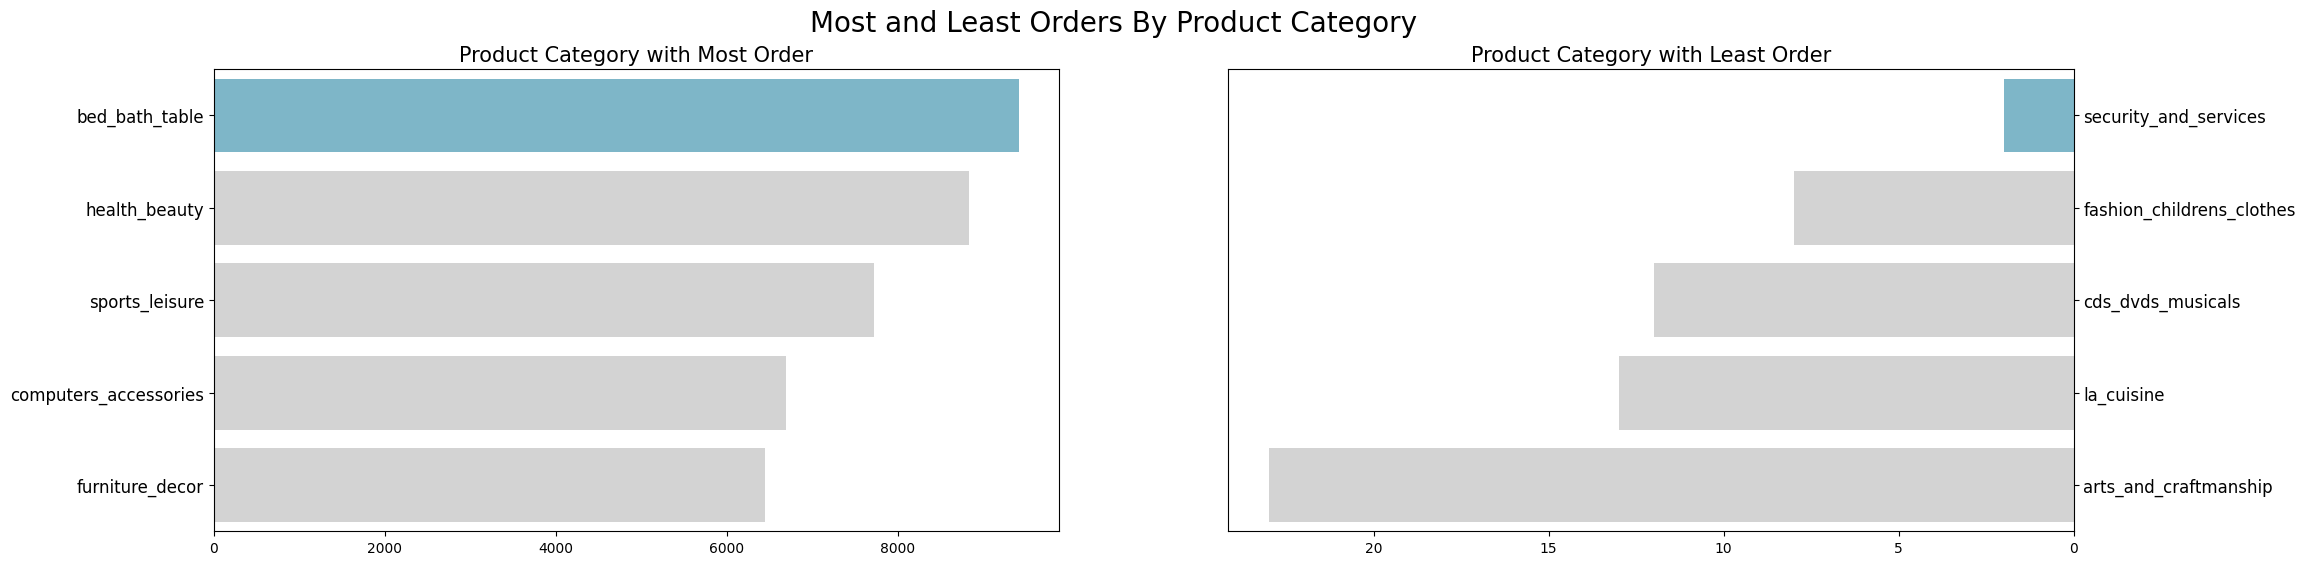

In [38]:
product_df = order_product_df.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=False).reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_id", y="product_category_name_english", data=product_df.head(5), palette=colors, ax=ax[0])
ax[0].set_title("Product Category with Most Order", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

sns.barplot(x="order_id", y="product_category_name_english", data=product_df.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Product Category with Least Order", loc="center", fontsize=15)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Most and Least Orders By Product Category", fontsize=20)
plt.show()

### Pertanyaan 4:

C:\Users\ACER\AppData\Local\Temp\ipykernel_24424\551337275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ACER\AppData\Local\Temp\ipykernel_24424\551337275.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


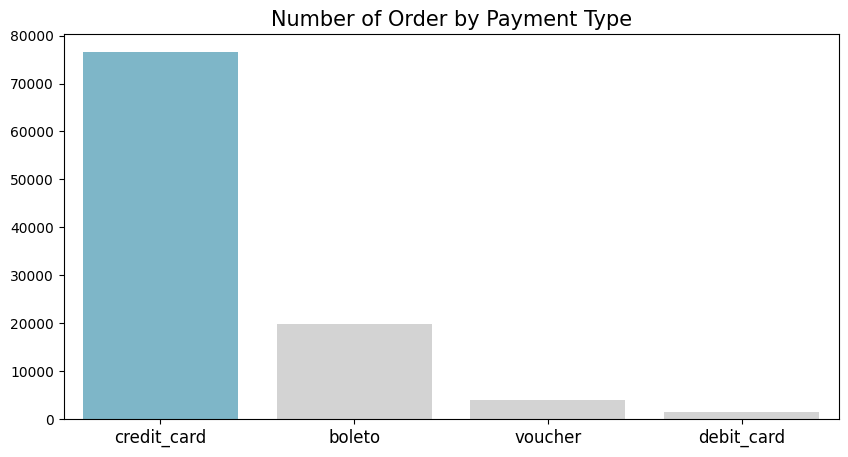

In [39]:
pay_df = payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 5))

sns.barplot(
    y="order_id", 
    x="payment_type",
    data=pay_df,
    palette=colors
)
plt.title("Number of Order by Payment Type", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 5:

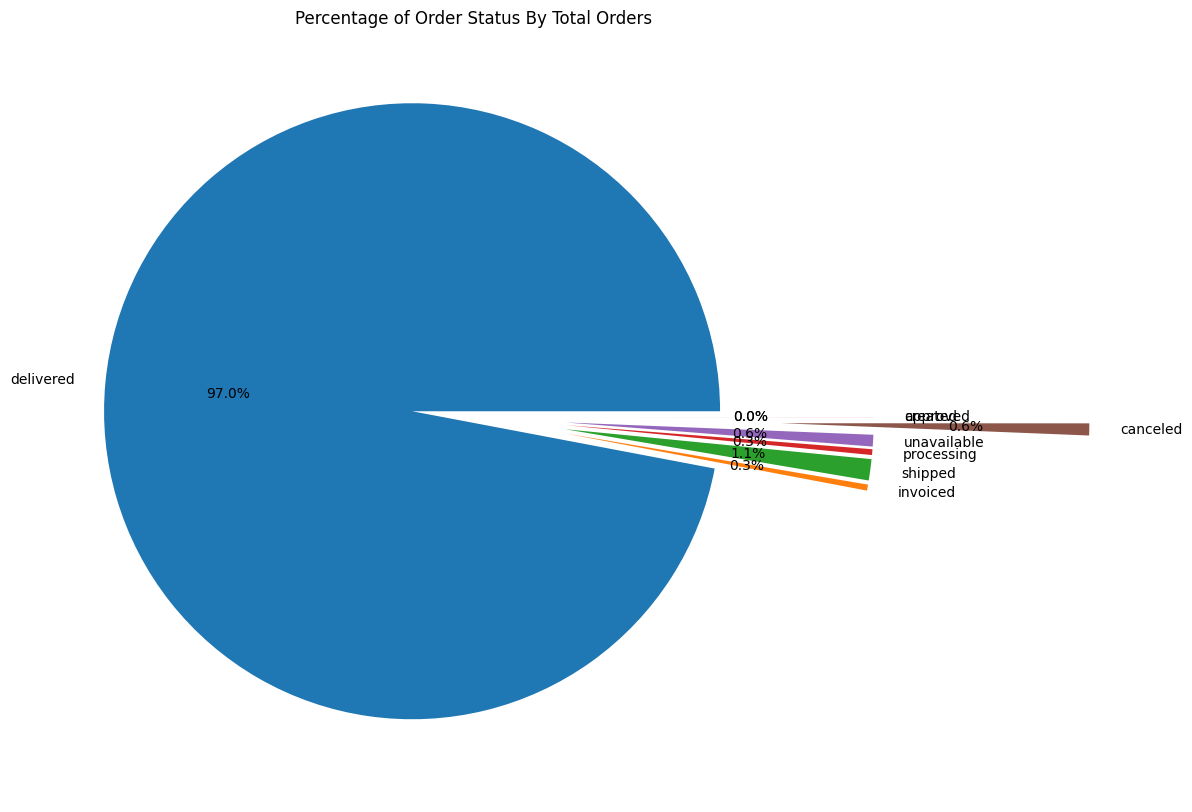

In [40]:
jumlah_delivered = order_customer_df[order_customer_df["order_status"] == 'delivered'].shape[0]
jumlah_invoiced = order_customer_df[order_customer_df["order_status"] == 'invoiced'].shape[0]
jumlah_shipped = order_customer_df[order_customer_df["order_status"] == 'shipped'].shape[0]
jumlah_processing = order_customer_df[order_customer_df["order_status"] == 'processing'].shape[0]
jumlah_unavailable = order_customer_df[order_customer_df["order_status"] == 'unavailable'].shape[0]
jumlah_canceled = order_customer_df[order_customer_df['order_status'] == 'canceled'].shape[0]
jumlah_created = order_customer_df[order_customer_df["order_status"] == 'created'].shape[0]
jumlah_approved = order_customer_df[order_customer_df["order_status"] == 'approved'].shape[0]

plt.figure(figsize=(12,10))
plt.pie(
    x=(jumlah_delivered, jumlah_invoiced, jumlah_shipped, jumlah_processing, jumlah_unavailable, jumlah_canceled, jumlah_created, jumlah_approved),
    labels=order_customer_df["order_status"].unique(),
    autopct='%1.1f%%',
    explode=(0.2,0.3,0.3,0.3,0.3,1,0.3,0.3)
)
plt.title("Percentage of Order Status By Total Orders")
plt.show()

## Analisis Lanjutan (Opsional)

### Pertanyaan 6:

In [41]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
order_df["order_purchase_timestamp"] = pd.to_datetime(order_df["order_purchase_timestamp"])
recent_date = order_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


In [42]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
28665,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.00,44
26020,448945bc713d98b6726e82eda6249b9e,1,457.75,49
27873,496630b6740bcca28fce9ba50d8a26ef,1,24.90,49
87562,e60df9449653a95af4549bbfcb18a6eb,1,418.00,49
41752,6e353700bc7bcdf6ebc15d6de16d7002,1,45.90,49


In [43]:
rfm_df.sort_values(by="recency", ascending=True).head(25)

,customer_id,frequency,monetary,recency
28665,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.00,44
26020,448945bc713d98b6726e82eda6249b9e,1,457.75,49
27873,496630b6740bcca28fce9ba50d8a26ef,1,24.90,49
87562,e60df9449653a95af4549bbfcb18a6eb,1,418.00,49
41752,6e353700bc7bcdf6ebc15d6de16d7002,1,45.90,49
32863,56b1ac2855cc6d7950b4ffa6a9b41b0d,1,109.90,49
86880,e450a297a7bc6839ceb0cf1a2377fa02,1,63.90,49
70465,b8c19e70d00f6927388e4f31c923d785,1,169.80,49
31942,54365416b7ef5599f54a6c7821d5d290,1,99.00,49
6283,10a79ef2783cae3d8d678e85fde235ac,1,6.90,49


In [44]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
97253,ffffa3172527f765de70084a7e53aae8,1,21.80,410
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427


In [45]:
rfm_df["frequency"].nunique()

1

In [46]:
rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_id,frequency,monetary,recency
8379,1617b1357756262bfa56ab541c47bc16,1,13440.00,383
58912,9af2372a1e49340278e7c1ef8d749f34,1,11383.95,545
84700,de832e8dbb1f588a47013e53feaa67cc,1,10856.10,506
37802,63b964e79dee32a3587651701a2b8dbf,1,9888.00,245
42127,6f241d5bbb142b6f764387c8c270645a,1,9520.14,160


In [47]:
rfm_df.sort_values(by="monetary", ascending=True).head(5)

,customer_id,frequency,monetary,recency
60708,9f9d249355f63c5c1216a82b802452c1,1,0.85,176
8387,161b6d415e8b3413c6609c70cf405b5a,1,0.85,176
9278,184e8e8e48937145eb96c721ef1f0747,1,2.29,399
80322,d2c63ad286e3ca9dd69218008d61ff81,1,2.90,650
34410,5ac9fcc9259df95cf14d27238b112148,1,2.99,257


C:\Users\ACER\AppData\Local\Temp\ipykernel_24424\1210342829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\ACER\AppData\Local\Temp\ipykernel_24424\1210342829.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\ACER\AppData\Local\Temp\ipykernel_24424\1210342829.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

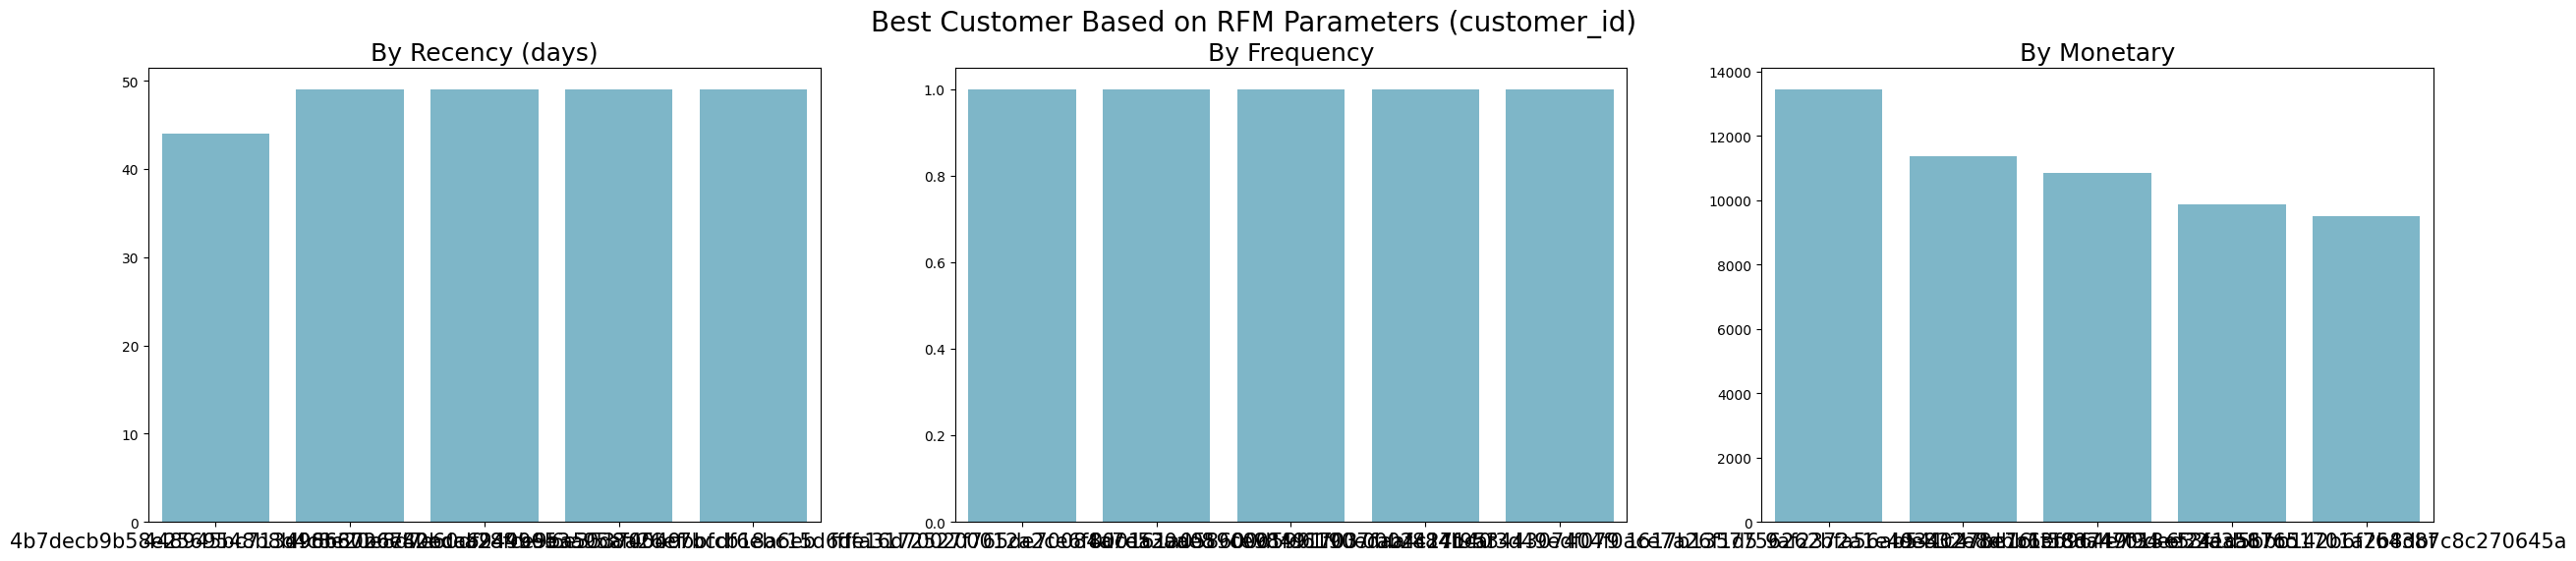

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**
- Pengguna terakhir kali melakukan order 44 hari yang lalu
- Setiap pelanggan melakukan 1 pemesanan (mungkin app memberi id unik yang baru setiap pengguna login atau masuk aplikasi)
- Pengeluaran pelanggan beragam mulai dari 13440 sampai 0.85.

## Conclusion

- Conclusion pertanyaan 1 <br>
Tren pemesanan pada tahun 2017 cenderung menaik, sementara pada tahun 2018 cenderung stabil namun sedikit turun. Penurunan drastis terjadi pada bulan 8 ke 9, dimana sebelumnya pada bulan 8 terdapat 6512 pesanan, sementara pada bulan 9 terdapat 16 pesanan. Pesanan pada tahun 2018 stabil berada di atas 6000 untuk 8 bulan awal, sementara pada tahun 2017 pesanan hanya mencapai di atas 6000 pada bulan 11 saja.

- Conclusion pertanyaan 2 <br>
State dengan jumlah order yang paling banyak adalah SP. State dengan jumlah order yang paling sedikit adalah RR.

- Conclusion pertanyaan 3 <br>
Kategori Produk yang paling sering dibeli adalah bed_bath_table. Kategori Produk yang paling jarang dibeli adalah security_and_services

- Conclusion pertanyaan 4 <br>
Metode Pembayaran yang paling sering dipakai adalah credit card. Metode Pembayaran yang paling jarang dipakai adalah debit card

- Conclusion pertanyaan 5 <br>
Persentase order dengan status canceled atau di-cancel adalah 0.63% (625 dari 99441)

- Conclusion pertanyaan 6 <br>
Pengguna terakhir kali melakukan pemesanan 44 hari yang lalu

- Conclusion pertanyaan 7 <br>
Setiap pengguna melakukan 1 pesanan

- Conclusion pertanyaan 8 <br>
Pengeluaran pengguna beragam dari 0.85 sampai 13440